In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score


In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columns = ["ID", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape",
           "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", 
           "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]

df = pd.read_csv(url, names=columns)

In [4]:
# Display first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        ID  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1            

In [5]:
df

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
# Drop the ID column as it's not useful for prediction
df.drop(columns=["ID"], inplace=True)

# Convert 'Bare_Nuclei' to numeric (handling missing values represented as '?')
df.replace("?", np.nan, inplace=True)
df["Bare_Nuclei"] = df["Bare_Nuclei"].astype(float)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
df.iloc[:, :] = imputer.fit_transform(df)

# Convert class labels (2 = benign, 4 = malignant) to binary classification (0 and 1)
df["Class"] = df["Class"].map({2: 0, 4: 1})


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       699.000000            699.000000             699.000000   
mean          4.417740              3.134478               3.207439   
std           2.815741              3.051459               2.971913   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count         699.000000                   699.000000   699.000000   
mean            2.806867                     3.216023     3.544656   
std             2.855379                     2.214300     3.601852   
min             1.000000                     1.000000     1

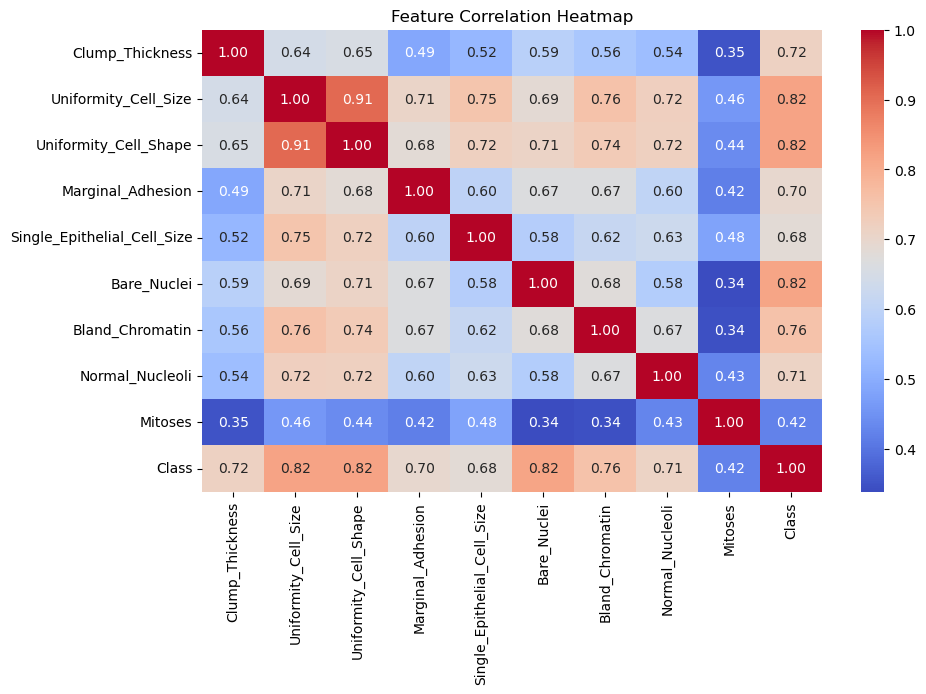

C:\Users\user\AppData\Local\Temp\ipykernel_1972\1986976749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette="coolwarm")


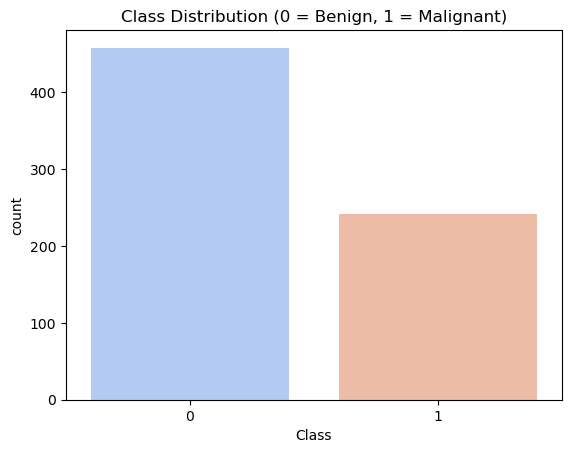

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Class distribution
sns.countplot(x=df["Class"], palette="coolwarm")
plt.title("Class Distribution (0 = Benign, 1 = Malignant)")
plt.show()


In [9]:
# Define target variable for regression (use Uniformity_Cell_Size as an example)
X_lin = df.drop(columns=["Uniformity_Cell_Size"])
y_lin = df["Uniformity_Cell_Size"]

# Split data for Linear Regression
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

# Predict using Linear Regression
y_pred_lin = lin_reg.predict(X_test_lin)

In [10]:
# Evaluate Linear Regression
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test_lin, y_pred_lin):.4f}")
print(f"R² Score: {r2_score(y_test_lin, y_pred_lin):.4f}")


Linear Regression Evaluation:
Mean Squared Error: 1.8929
R² Score: 0.7988


In [11]:
# Define features and target for classification
X = df.drop(columns=["Class"])
y = df["Class"]

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred = log_reg.predict(X_test)

In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Evaluation:")
print(f"Model Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Evaluation:
Model Accuracy: 95.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140




Feature Importance:
                        Feature  Coefficient
5                  Bare_Nuclei     1.574208
0              Clump_Thickness     1.178050
6              Bland_Chromatin     0.844167
8                      Mitoses     0.812959
2        Uniformity_Cell_Shape     0.759684
3            Marginal_Adhesion     0.582244
7              Normal_Nucleoli     0.517574
4  Single_Epithelial_Cell_Size     0.206891
1         Uniformity_Cell_Size     0.117899


C:\Users\user\AppData\Local\Temp\ipykernel_6528\2347074961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="coolwarm")


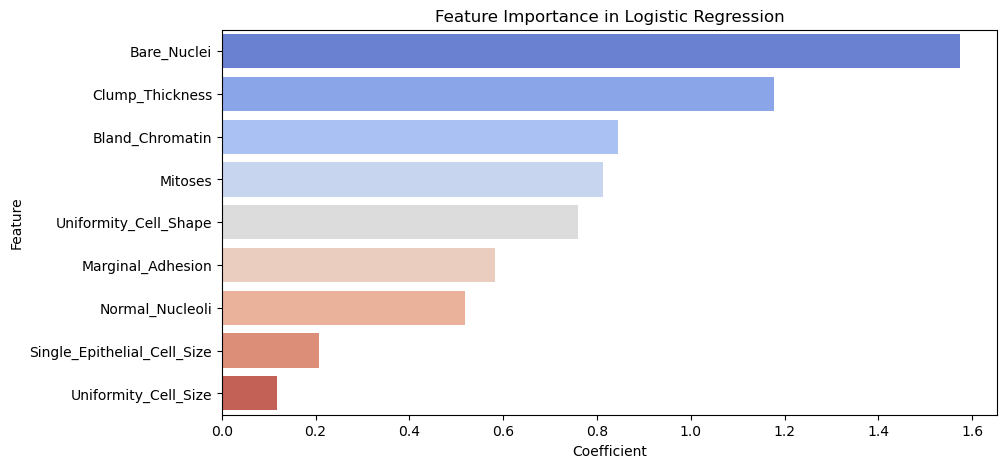

In [59]:
# Extract feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display feature importance
print("\nFeature Importance:\n", feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Feature Importance in Logistic Regression")
plt.show()